# Markov Random Field Image de-noising
[**Original source code**](https://github.com/andreydung/MRF/blob/master/mrf_denoise.py)

Implement a Markov Random Field to denoise an image.

In [1]:
# Older version of Pillow is needed
!pip install pillow==6.2.2

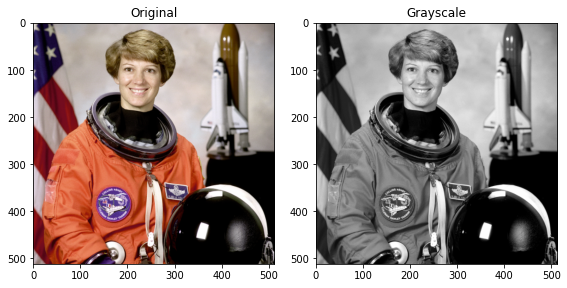

In [2]:
# Get astronaut test image from scikit-image module
import matplotlib.pyplot as plt

from skimage import data, img_as_ubyte
from skimage.color import rgb2gray

original = data.astronaut()
grayscale = rgb2gray(original)
grayscale = img_as_ubyte(grayscale)  # convert float64 to uint8

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title('Original')
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title('Grayscale')

fig.tight_layout()
plt.show()

0.4826164245605469
0.0


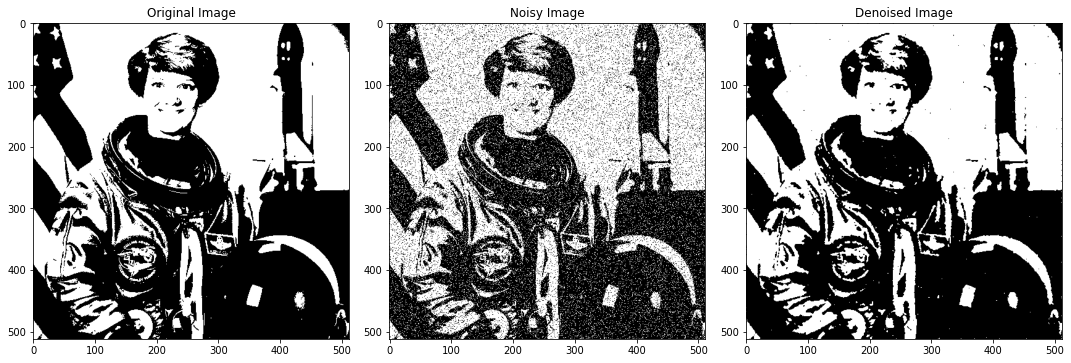

In [3]:
# Image denoising using Markov Random Field (MRF) model
import numpy as np
import matplotlib.pyplot as plt


def main():
    im = np.array(grayscale)  # get test grayscale image
    im = np.where(im > 127, 1, 0)  # convert to binary image
    M, N = im.shape  # get height and width in pixels

    # Add noise to the copy image
    noisy = im.copy()  # copy image
    noise = np.random.rand(M, N)  # generate noise array
    ind = np.where(noise < 0.1)  # set noise level
    noisy[ind] = 1 - noisy[ind]  # invert binary pixel

    out = MRF_denoise(noisy)  # apply MRF
    
    # Show original, noise and denoised images
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    ax = axes.ravel()

    ax[0].imshow(im, cmap=plt.cm.gray)
    ax[0].set_title('Original Image')
    ax[1].imshow(noisy, cmap=plt.cm.gray)
    ax[1].set_title('Noisy Image')
    ax[2].imshow(out, cmap=plt.cm.gray)
    ax[2].set_title('Denoised Image')

    fig.tight_layout()
    plt.show()


def MRF_denoise(noisy):
    # Start Markov Random Field   
    M, N = noisy.shape
    y_old = noisy
    y = np.zeros((M, N))

    while(SNR(y_old, y) > 0.01):
        print(SNR(y_old, y))
        for i in range(M):
            for j in range(N):
                index = neighbor(i, j, M, N)
                
                a = cost(1, noisy[i,j], y_old, index)
                b = cost(0, noisy[i,j], y_old, index)

                if a > b:
                    y[i,j] = 1
                else:
                    y[i,j] = 0
        y_old = y
    print(SNR(y_old, y))
    return y


def SNR(A, B):
    # Calculate signal to noise ratio (SNR)
    if A.shape==B.shape:
        return np.sum(np.abs(A-B))/A.size
    else:
        raise Exception('Two matrices must have the same size!')

def neighbor(i, j, M, N):
    # Find correct neighbors around (i,j) pixel
    if (i==0 and j==0):
        index = [(0,1), (1,0)]
    elif i==0 and j==N-1:
        index = [(0,N-2), (1,N-1)]
    elif i==M-1 and j==0:
        index = [(M-1,1), (M-2,0)]
    elif i==M-1 and j==N-1:
        index = [(M-1,N-2), (M-2,N-1)]
    elif i==0:
        index = [(0,j-1), (0,j+1), (1,j)]
    elif i==M-1:
        index = [(M-1,j-1), (M-1,j+1), (M-2,j)]
    elif j==0:
        index = [(i-1,0), (i+1,0), (i,1)]
    elif j==N-1:
        index = [(i-1,N-1), (i+1,N-1), (i,N-2)]
    else:
        index = [(i-1,j), (i+1,j), (i,j-1), (i,j+1),\
                 (i-1,j-1), (i-1,j+1), (i+1,j-1), (i+1,j+1)]
    return index


def cost(y, x, y_old, index):
    # Calculate cost
    alpha=1
    beta=10
    return alpha * delta(y,x) + \
           beta * sum(delta(y, y_old[i]) for i in index)


def delta(a, b):
    if a==b:
        return 1
    else:
        return 0


if __name__=='__main__':
    main()
